# Task no 2: Performing the EDA, Outlier Treatment and ML model preparation from the given dataset
## Name of the student: Piyush Tanaji Bhujbal
## Role: Data Science Intern at Innomatics Research Labs

## Topics of study:
### Exploratory Data Analysis
### Outlier Treatment
### ML model implementation and accuracy Check

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Getting the general information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.shape

(48842, 15)

In [6]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Statistics

In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Checking for missing values

In [8]:
data.workclass.replace("?", np.nan, inplace = True)

In [9]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [10]:
data.dropna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Checking for Unique values

In [11]:
data.workclass.unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [13]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
data.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [15]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

## Data Transformation

In [16]:
data.income.replace("<=50K", "Less than 50000", inplace = True)
data.income.replace(">50K", "Greater than 50000", inplace = True)

In [17]:
data.income.unique()

array(['Less than 50000', 'Greater than 50000'], dtype=object)

In [18]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

## Pairplot for the data

<Figure size 1080x504 with 0 Axes>

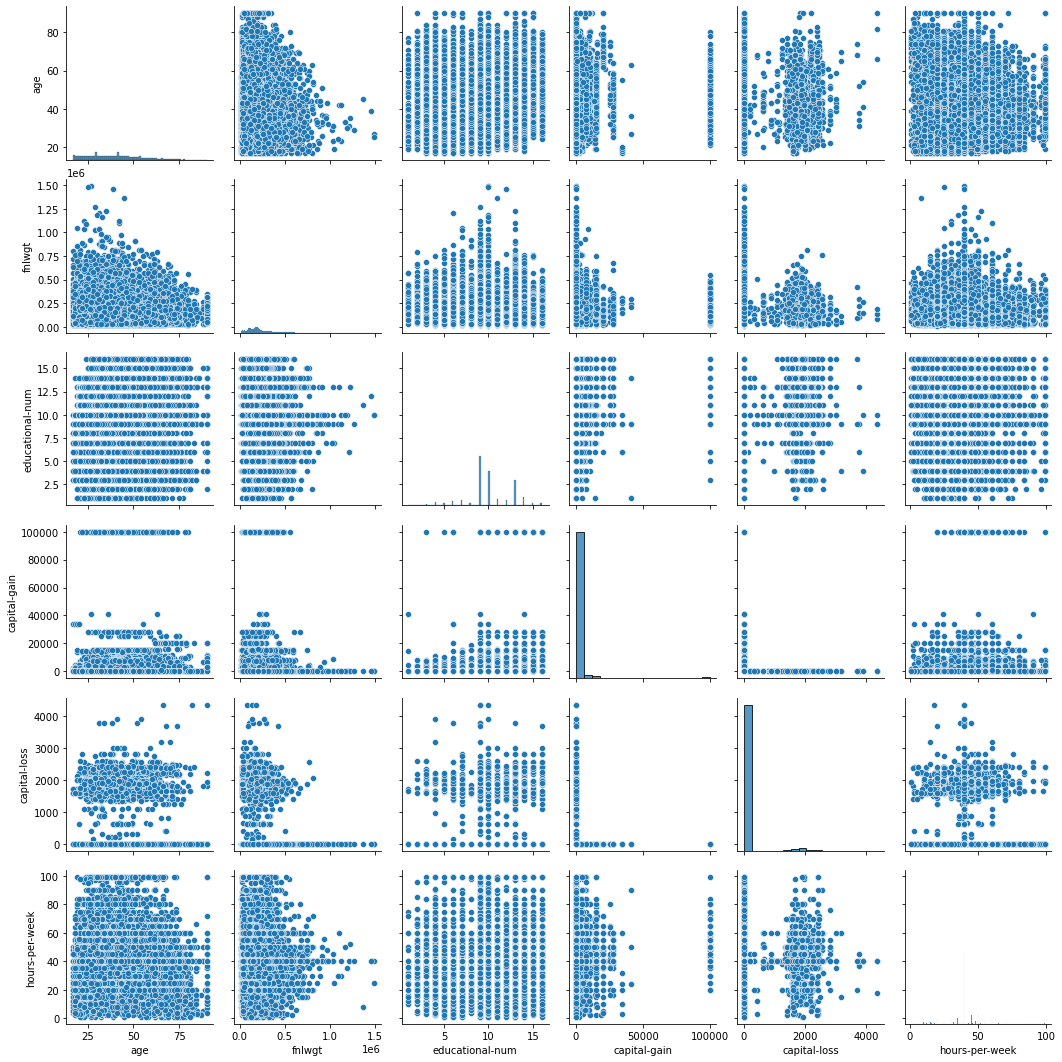

In [19]:
plt.figure(figsize = (15, 7))
sns.pairplot(data)
plt.show()

In [20]:
data.workclass.unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## Splitting the data into Private and Government worktypes

In [21]:
private_data = data[(data['workclass'] == 'Private')]

In [22]:
private_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Less than 50000
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,Less than 50000
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,Greater than 50000
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,Less than 50000
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,Less than 50000


In [23]:
govt_data = data[((data['workclass'] == "Local-gov") | (data['workclass'] == "State-gov") | (data['workclass'] == "Federal-gov"))]

In [24]:
govt_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Greater than 50000
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,Less than 50000
16,20,State-gov,444554,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,Less than 50000
30,46,State-gov,106444,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,7688,0,38,United-States,Greater than 50000
33,23,Local-gov,258120,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Less than 50000


<AxesSubplot:>

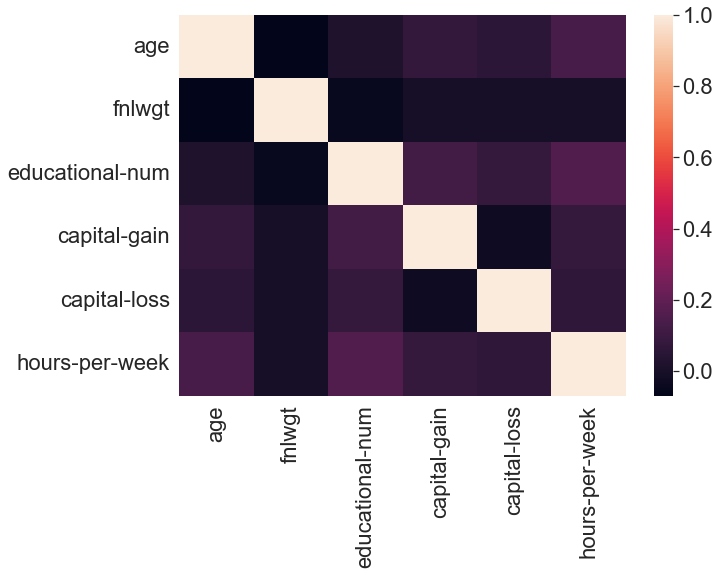

In [25]:
sns.set(font_scale = 2)
plt.figure(figsize = (10 , 7))
pvt_corr = private_data.corr()
sns.heatmap(pvt_corr)


<AxesSubplot:>

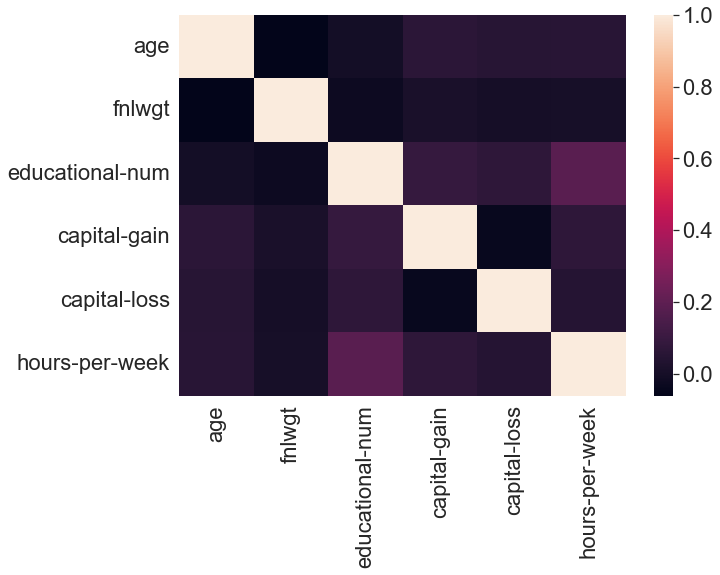

In [26]:
plt.figure(figsize = (10 , 7))
govt_corr = govt_data.corr()
sns.heatmap(govt_corr)


<AxesSubplot:xlabel='gender', ylabel='age'>

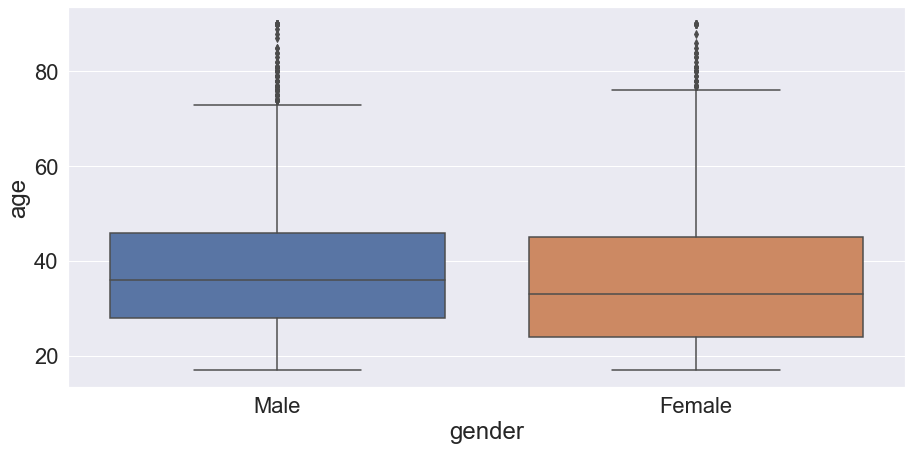

In [27]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "gender", y = "age", data = private_data.sort_values('gender', ascending = False))

<AxesSubplot:xlabel='gender', ylabel='age'>

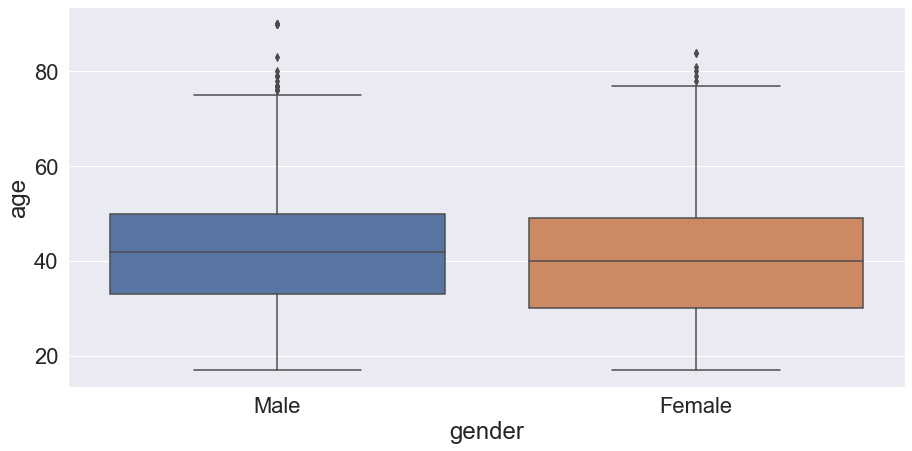

In [28]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "gender", y = "age", data = govt_data.sort_values('gender', ascending = False))

In [29]:
govt_data.relationship.unique()

array(['Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

<AxesSubplot:xlabel='relationship', ylabel='age'>

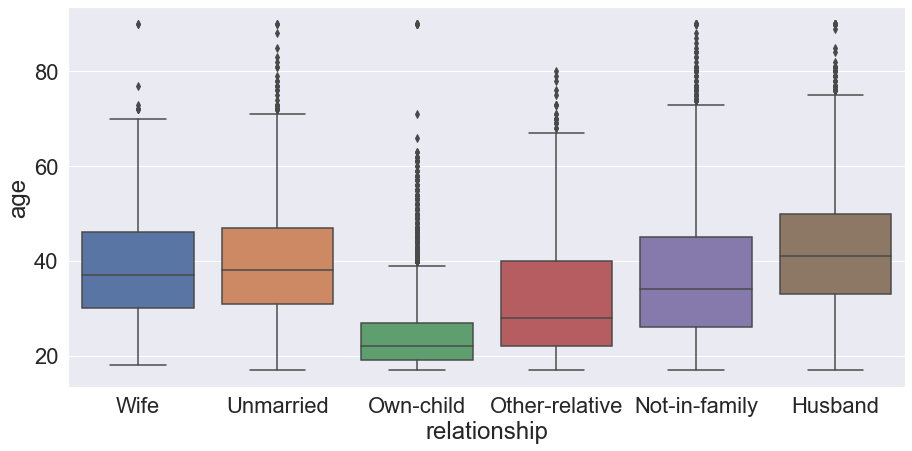

In [30]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "relationship", y = "age", data = private_data.sort_values('relationship', ascending = False))

<AxesSubplot:xlabel='relationship', ylabel='age'>

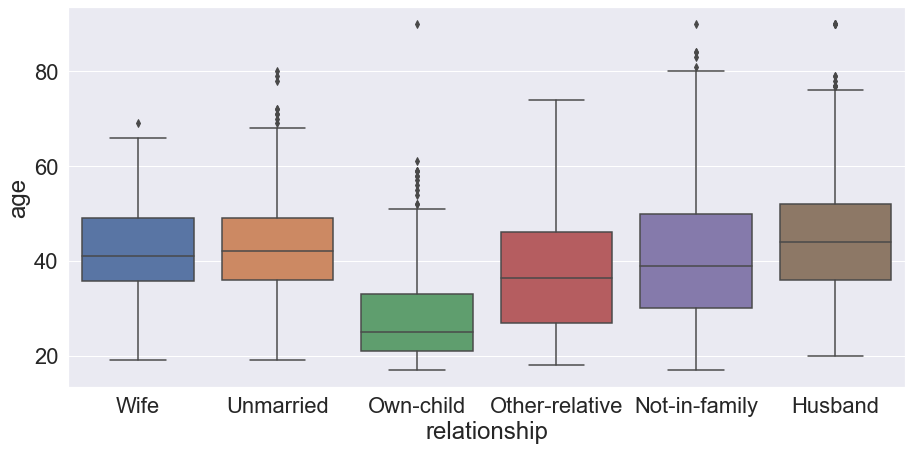

In [31]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "relationship", y = "age", data = govt_data.sort_values('relationship', ascending = False))

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

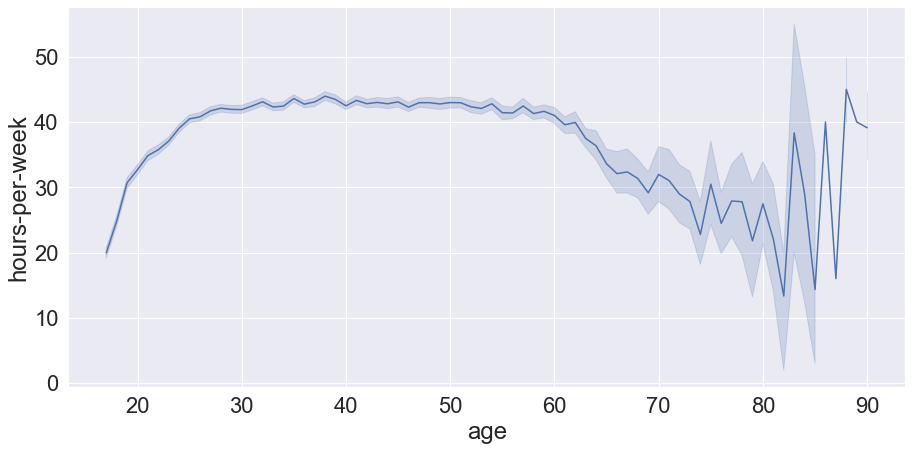

In [32]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = "age", y = "hours-per-week", data = private_data.sort_values('age', ascending = False))

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

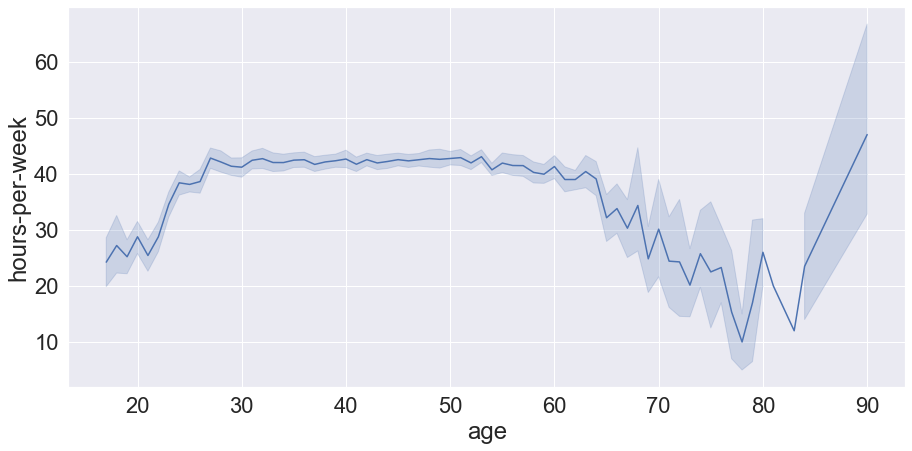

In [33]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = "age", y = "hours-per-week", data = govt_data.sort_values('age', ascending = False))

<AxesSubplot:xlabel='education', ylabel='age'>

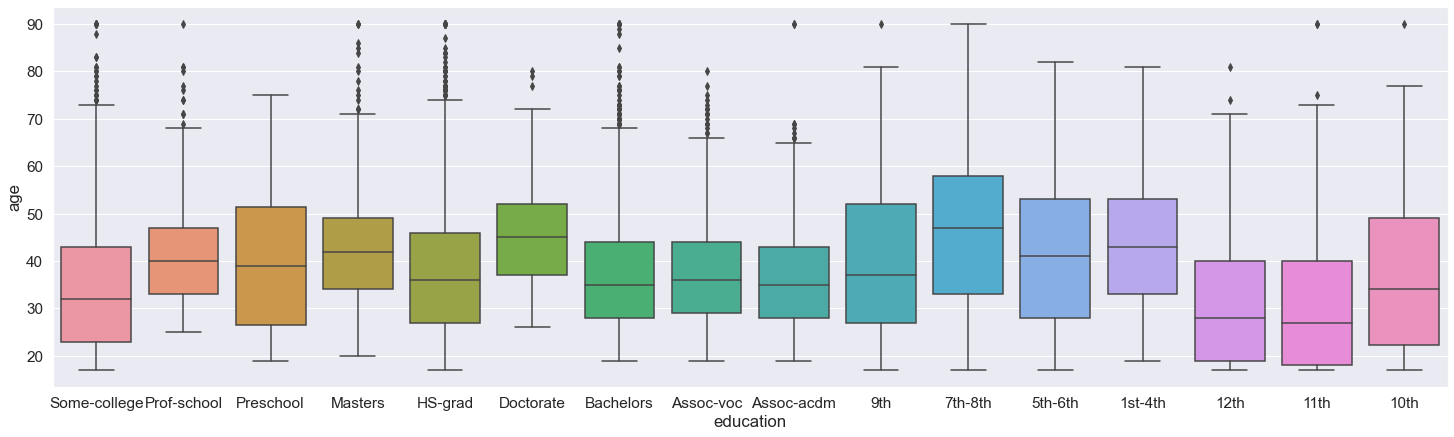

In [34]:
sns.set(font_scale = 1.4)
plt.figure(figsize = (25, 7))
sns.boxplot(x = "education", y = "age", data = private_data.sort_values('education', ascending = False))

<AxesSubplot:xlabel='education', ylabel='age'>

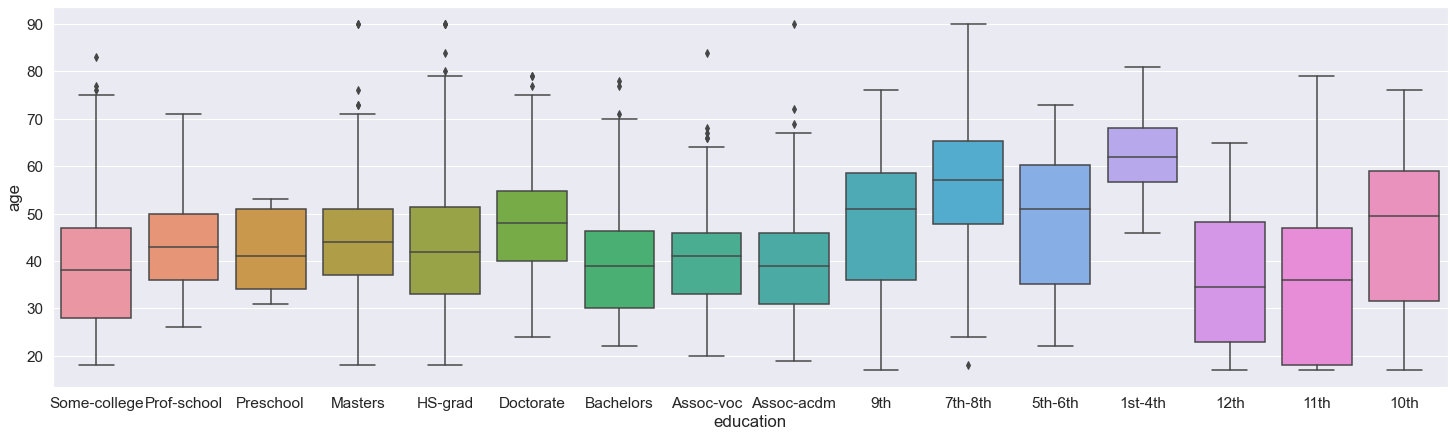

In [35]:
plt.figure(figsize = (25, 7))
sns.boxplot(x = "education", y = "age", data = govt_data.sort_values('education', ascending = False))

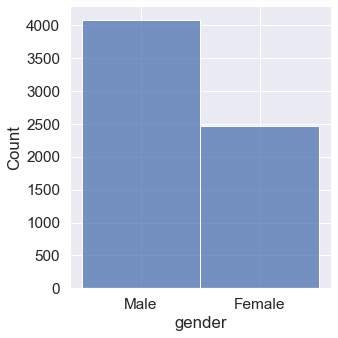

In [36]:
sns.displot(govt_data['gender'], discrete = True)

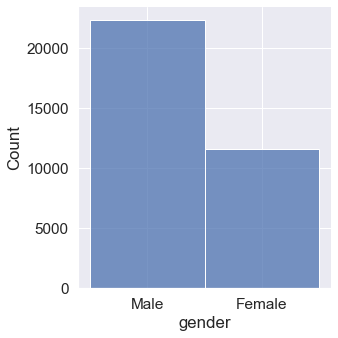

In [37]:
sns.displot(private_data['gender'],  discrete = True)

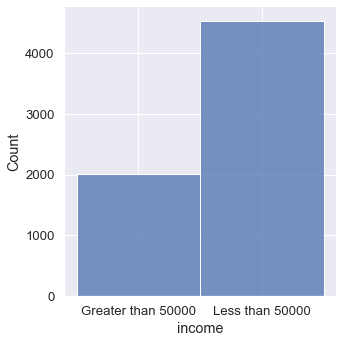

In [38]:
sns.set(rc={'figure.figsize':(15, 7)}, font_scale = 1.2)
sns.displot(govt_data['income'])
plt.show()

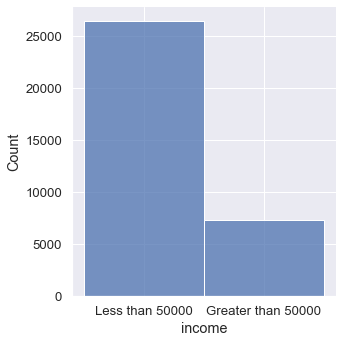

In [39]:
sns.displot(private_data['income'])
plt.show()

## EDA Concusion

### From the Exploratory Data Anlysis we can conclude the following points:
### For Private Data:
### 1. Male employees are greater than female employees
### 2. Employees having salaries less than 50000 are greater in number
### 3. Employees with ages greater than 20 and less than 70 show a higher working capacity as the hours per work is almost same for the employees of this range. Other than this range the woking hours reduce as the age increase.
### 4. Young employees are more educated and aged employees are showing less focus towards education. 


### For Government Data:
### 1. Male employees are greater than female employees
### 2. Employees having salaries less than 50000 are greater in number
### 3. Employees with ages greater than 20 and less than 70 show a higher working capacity as the hours per work is almost same for the employees of this range. Other than this range the woking hours reduce as the age increase. There is a unstable graph of ups and downs in working hours after ages 70.
### 4. Young employees are more educated and aged employees are showing less focus towards education. While some employees between age ranges 60 - 60 have qualification for doctorate degrees.

In [40]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'O'] 
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [41]:
continuous_columns = [col for col in data.columns if data[col].dtype != 'O'] 
continuous_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [42]:
data.income.replace(["Less than 50000", "Greater than 50000"], [0, 1], inplace = True)

In [43]:
data.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [44]:
x = data.drop('income', axis = 1)
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [45]:
x = pd.get_dummies(x)
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
data = data.drop(['fnlwgt'], axis = 1)


In [47]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

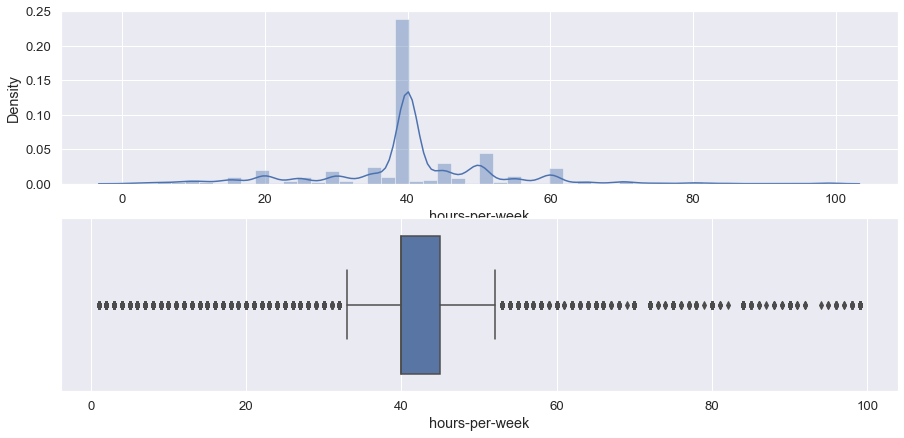

In [48]:
plot(data, 'hours-per-week')

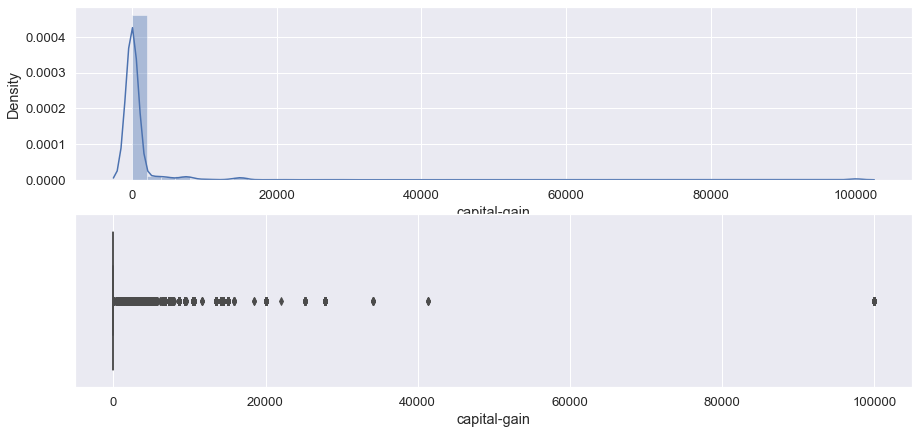

In [49]:
plot(data, 'capital-gain')

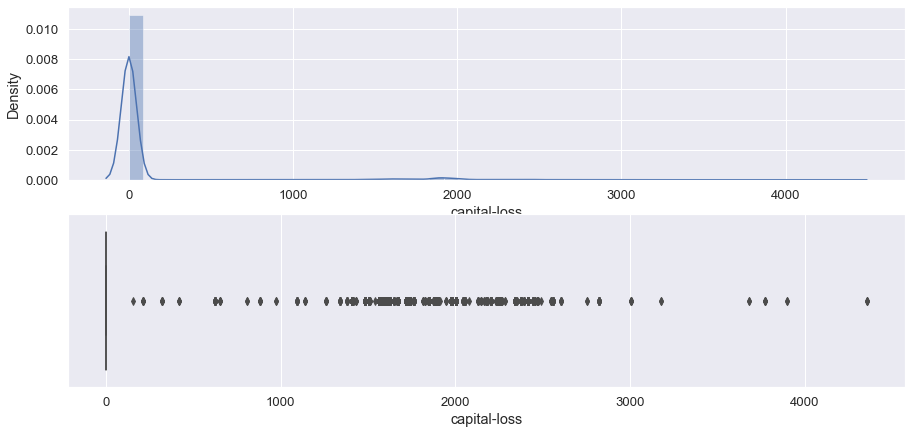

In [50]:
plot(data, 'capital-loss')

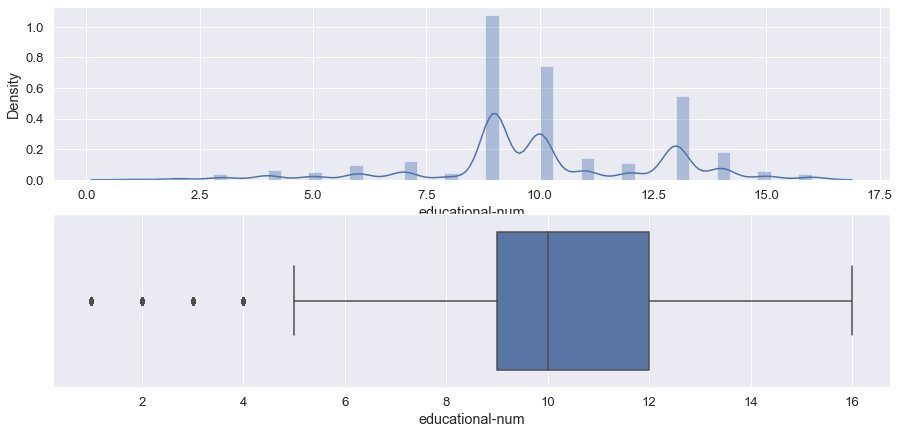

In [51]:
plot(data, "educational-num")

In [52]:
data['hours-per-week'] = np.where(data['hours-per-week'] >= 60, data['hours-per-week'].median(), data['hours-per-week'])

In [53]:
data['capital-gain'] = np.where(data['capital-gain'] >= 20000, data['capital-gain'].median(), data['capital-gain'])

In [54]:
data['capital-loss'] = np.where(data['capital-loss'] >= 2000, data['capital-loss'].median(), data['capital-loss'])

In [55]:
y = data['income']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

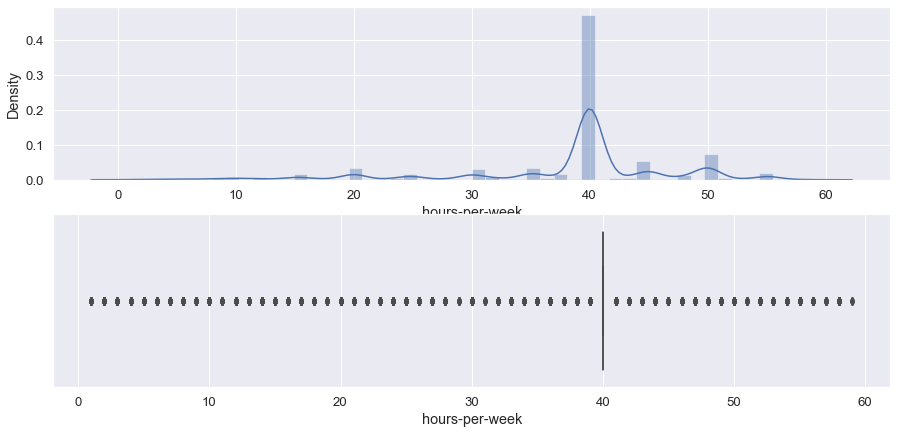

In [56]:
plot(data, 'hours-per-week')

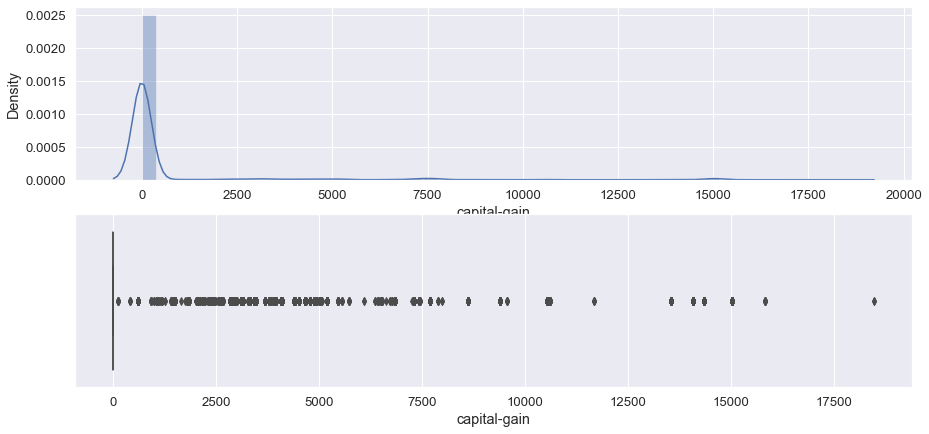

In [57]:
plot(data, 'capital-gain')

In [58]:
data["educational-num"] = np.where(data["educational-num"] >= 10.0, data["educational-num"].median(), data["educational-num"])

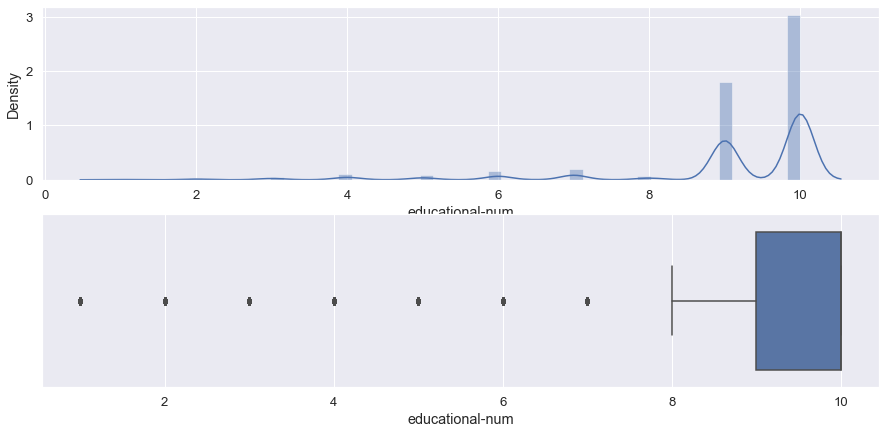

In [59]:
plot(data, 'educational-num')

## Phase of Feature Selection

In [60]:
from sklearn.feature_selection import mutual_info_classif
imp_cols = mutual_info_classif(x, y)
imp_cols

array([6.89629257e-02, 3.91091675e-02, 6.48559047e-02, 8.27052433e-02,
       3.31221720e-02, 4.59875485e-02, 5.25256184e-04, 1.03277447e-03,
       0.00000000e+00, 5.64711529e-03, 7.09233940e-03, 0.00000000e+00,
       4.30433190e-04, 0.00000000e+00, 2.19661072e-03, 8.76913691e-03,
       0.00000000e+00, 0.00000000e+00, 1.97834605e-03, 7.84181583e-04,
       3.18186462e-04, 0.00000000e+00, 0.00000000e+00, 1.70877403e-02,
       9.11617655e-03, 1.13288470e-02, 1.30047196e-02, 1.79216946e-03,
       5.86579250e-03, 5.76735201e-03, 6.30755817e-03, 1.65143453e-03,
       1.07778919e-01, 0.00000000e+00, 6.47215473e-02, 4.63569833e-04,
       1.83958089e-03, 6.81222459e-03, 3.86892933e-03, 0.00000000e+00,
       2.74651084e-03, 2.18170881e-02, 1.26478354e-03, 2.73562311e-03,
       0.00000000e+00, 1.55319332e-02, 8.80823579e-04, 1.73160256e-02,
       0.00000000e+00, 0.00000000e+00, 1.85176119e-03, 0.00000000e+00,
       7.99689286e-02, 1.82965977e-02, 7.86558253e-03, 3.62883004e-02,
      

In [61]:
important = pd.DataFrame(imp_cols, x.columns)
important

,0
age,0.068963
fnlwgt,0.039109
educational-num,0.064856
capital-gain,0.082705
capital-loss,0.033122
...,...
native-country_Thailand,0.000000
native-country_Trinadad&Tobago,0.000272
native-country_United-States,0.007035
native-country_Vietnam,0.000000


## Splitting the train and test features

In [62]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    sns.distplot(y_test-y_prediction, ax = ax1)
    plot = sns.distplot(y_test, hist = False, ax = ax2, label = 'Actual Values')
    plot = sns.distplot(y_prediction, hist = False, ax = ax3, label = 'Predicted Values')
    plt.legend()
    
    

## Random Forest Regressor Implementation

In [65]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9221762523406671
predictions are: 
 [0.   0.36 0.27 ... 0.   0.69 0.08]


r2 score: 0.4561841787462817
Mean Absolute Error: 0.1862590214916963
Mean Squared Error: 0.09952241486118452
Root Mean Squared Error: 0.31547173385453176


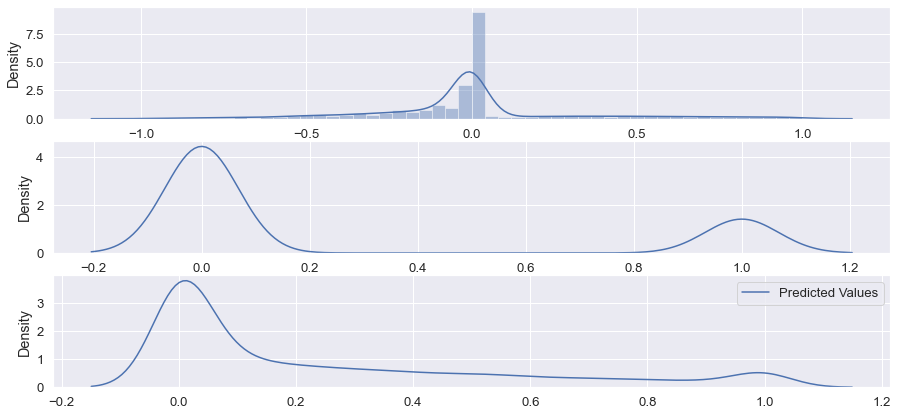

In [66]:
predict(RandomForestRegressor())

## Decision Tree REgressor Classifier implementation

In [67]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9997184157274512
predictions are: 
 [0. 0. 1. ... 0. 1. 0.]


r2 score: 0.019046304993041274
Mean Absolute Error: 0.17959873067867746
Mean Squared Error: 0.17952195721158767
Root Mean Squared Error: 0.4237003153309986


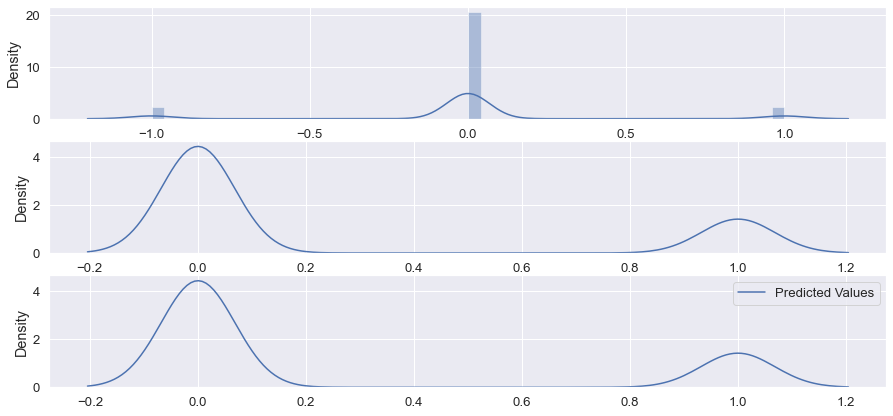

In [68]:
predict(DecisionTreeRegressor())

## Implemented two ML algorithms on the given dataset using "income" as a dependent parameter
## Accuracy of the Linear Regression Model: 92.2%
## Accuracy of the Decision Tree Regression Model: 99%